In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
credit_card_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv',header = 0)

Without using Column Transformer

In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
# separating the data for analysis

legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
# statistical measures of the amount

legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
# compare the values for both transactions

credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
legit_sample = legit.sample(n=492)
print(legit_sample)

            Time        V1        V2        V3        V4        V5        V6  \
48730    43760.0 -2.376964  2.460837 -0.418793  0.314862 -1.977948 -1.433790   
118332   75041.0  1.318332  0.164788  0.143785  0.432647 -0.149158 -0.533638   
121339   76155.0 -0.707797  0.669129  1.798761 -1.292982 -0.051346 -1.050599   
60671    49438.0  1.281082 -0.096675  0.053805 -0.249783 -0.112476 -0.079874   
99142    66985.0 -0.850467  0.698416  2.107985 -0.031906  0.612608 -0.084461   
...          ...       ...       ...       ...       ...       ...       ...   
13576    24070.0 -0.297804  1.151835  0.971276 -0.120678  0.717436  0.037365   
113132   72947.0  1.152268  0.072875  0.618890  0.644511 -0.626809 -0.822014   
50138    44363.0 -1.289744  1.229817  0.884603 -0.549596 -0.667094 -0.563184   
174459  121920.0  1.863231 -0.903581 -0.431799 -0.518110 -1.031421 -0.541818   
105989   69771.0  1.246270  0.282496  0.370339  0.793825 -0.485124 -1.302601   

              V7        V8        V9  .

In [ ]:
#Concatenation of legit and fraud transactions

new_dataset = pd.concat([legit_sample, fraud], axis=0)


In [ ]:
new_dataset.shape

(984, 31)

In [ ]:
new_dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
48730,43760.0,-2.376964,2.460837,-0.418793,0.314862,-1.977948,-1.433790,-1.164422,1.837155,-0.939796,...,0.066676,-0.529184,0.512044,0.911514,-0.563587,-0.132918,-0.870087,-0.244896,6.31,0
118332,75041.0,1.318332,0.164788,0.143785,0.432647,-0.149158,-0.533638,-0.014266,-0.102937,0.233167,...,-0.322378,-0.969608,0.043025,-0.484391,0.300080,0.149466,-0.035834,0.008695,1.98,0
121339,76155.0,-0.707797,0.669129,1.798761,-1.292982,-0.051346,-1.050599,0.811978,-0.308696,0.218673,...,-0.124723,-0.174444,-0.116324,0.433109,-0.386285,0.678635,-0.019089,-0.061640,20.00,0
60671,49438.0,1.281082,-0.096675,0.053805,-0.249783,-0.112476,-0.079874,-0.213993,0.068932,0.177835,...,-0.346991,-1.124344,0.037717,-0.849531,0.132109,0.530238,-0.071733,-0.005911,20.00,0
99142,66985.0,-0.850467,0.698416,2.107985,-0.031906,0.612608,-0.084461,0.799016,0.075002,-0.571694,...,0.020831,0.026240,-0.299216,-0.055050,0.366972,-0.513403,-0.129439,-0.169473,10.00,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
#value of legit and fraud transactions in new dataset

new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94530.581301,0.009499,0.093977,0.032003,-0.084234,-0.070649,-0.037877,-0.021031,0.012486,0.054401,...,-0.000111,0.032647,-0.032290,0.016006,-0.00507,-0.010356,0.044098,-0.017788,0.003738,79.118293
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


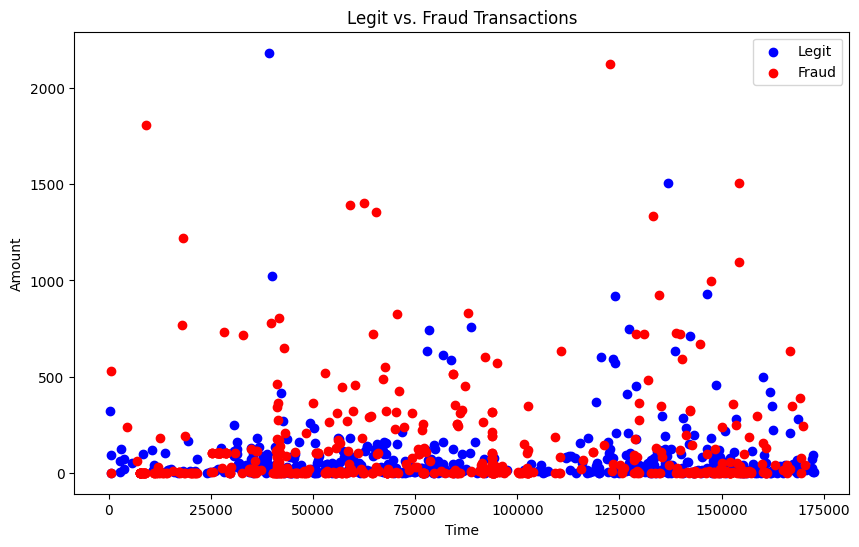

In [ ]:
# prompt: generate a scatterplot on legit v/s fraud transactions on the new_dataset

import matplotlib.pyplot as plt

# Create a scatter plot of 'Amount' vs 'Time' colored by 'Class'
plt.figure(figsize=(10, 6))
plt.scatter(new_dataset[new_dataset['Class'] == 0]['Time'], new_dataset[new_dataset['Class'] == 0]['Amount'], color='blue', label='Legit')
plt.scatter(new_dataset[new_dataset['Class'] == 1]['Time'], new_dataset[new_dataset['Class'] == 1]['Amount'], color='red', label='Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Legit vs. Fraud Transactions')
plt.legend()
plt.show()

In [ ]:
# # prompt: generate inferences for the above generated scatter plot
# Observations:
# Distribution of Legit Transactions: The majority of legit transactions seem to be concentrated towards the lower amounts and spread across a wide range of time.
# Distribution of Fraud Transactions: Fraudulent transactions appear more scattered and seem to occur across different time periods, with amounts potentially varying more widely
# compared to legit transactions.
# Potential Outliers: While it is difficult to conclusively say from the scatter plot alone, there might be some potential outlier transactions (both legit and fraudulent) with
# exceptionally high amounts.


# Inferences:
# Amount might be a useful predictor.  The scatter plot shows some potential segregation between legit and fraud transactions based on the amount, with fraudulent transactions
# appearing to involve higher amounts in some cases.

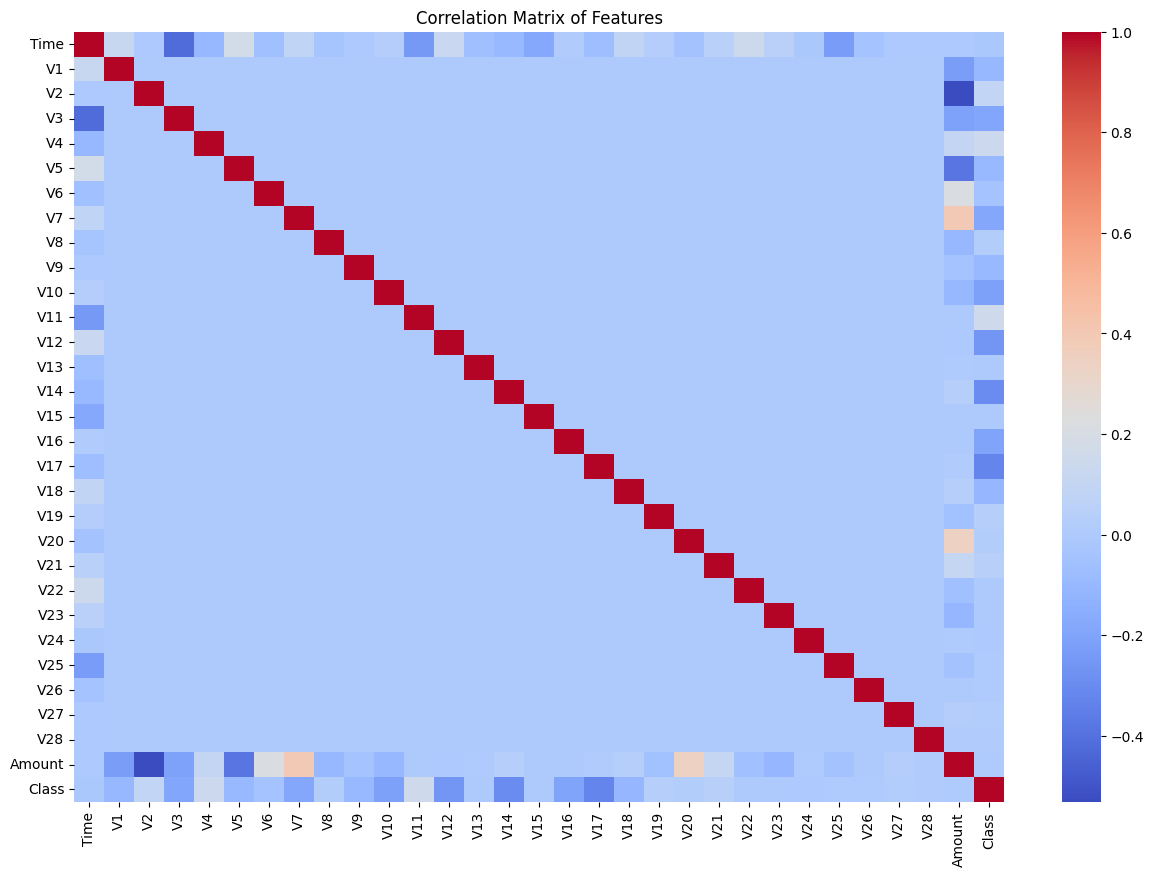

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 10))
correlation_matrix = credit_card_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


The heatmap shows the correlation between different features in the dataset.

Some features show strong positive or negative correlations with each other, indicating that they are related.

The diagonal of the heatmap always shows a perfect correlation (1.0) since it compares a feature with itself.



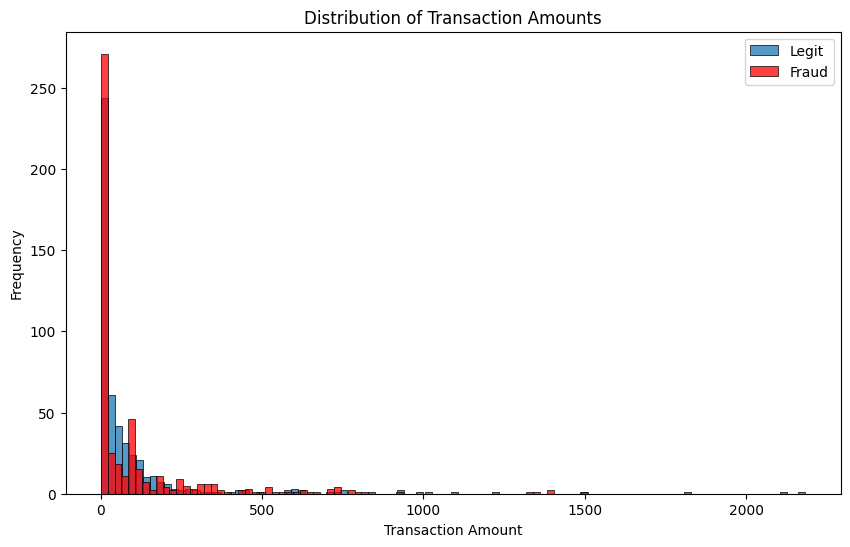

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(new_dataset[new_dataset['Class'] == 0]['Amount'], label='Legit', bins=100)
sns.histplot(new_dataset[new_dataset['Class'] == 1]['Amount'], label='Fraud', bins=100, color='red')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.legend()
plt.show()

In [ ]:
# Distribution of Transaction Amounts:
# Legit Transactions: The majority of legit transactions are clustered around lower amounts, with the frequency gradually decreasing as the transaction amount increases.
# Fraud Transactions: Fraudulent transactions have a different distribution compared to legit ones.  While they also have a concentration of lower amounts, we can see that they
# exhibit a slightly higher frequency of transactions with relatively higher amounts.

# Inferences

# Amount as a Predictor: The difference in distribution between legit and fraudulent transactions in terms of amount suggests that the 'Amount' feature can be potentially
#  useful in identifying fraudulent transactions.  Higher amounts might be more likely to be associated with fraudulent activities.
# Need for Further Investigation: This histogram alone provides a basic understanding of the transaction amount distributions. Further analysis using other features and potentially
#  more advanced techniques would be necessary to create a more reliable fraud detection model.

In [ ]:
#Performing train_test_split

X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X.shape,Y.shape)

(984, 30) (984,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape, Y_test.shape, Y_train.shape)

(984, 30) (787, 30) (197, 30) (197,) (787,)


In [ ]:
#Algorithm 1
#DecisionTreeClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)


cv_scores = cross_val_score(model, X, Y, cv=15)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Accuracy on Training data :  1.0
Accuracy on Test data :  0.9086294416243654
Cross-validation scores: [0.98484848 0.95454545 0.93939394 0.93939394 0.89393939 0.90909091
 0.89393939 0.90909091 0.89393939 0.90769231 0.90769231 0.86153846
 0.92307692 0.87692308 0.89230769]
Mean cross-validation score: 0.9124941724941726


In [ ]:
#Algorithm 2
#RandomForestClassifier


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

model_rf.fit(X_train, Y_train)


X_train_prediction_rf = model_rf.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, Y_train)
print('Accuracy on Training data (Random Forest): ', training_data_accuracy_rf)


X_test_prediction_rf = model_rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction_rf, Y_test)
print('Accuracy score on Test Data (Random Forest): ', test_data_accuracy_rf)


cv_scores_rf = cross_val_score(model_rf, X, Y, cv=15)
print("Cross-validation scores (Random Forest):", cv_scores_rf)
print("Mean cross-validation score (Random Forest):", cv_scores_rf.mean())




Accuracy on Training data (Random Forest):  1.0
Accuracy score on Test Data (Random Forest):  0.9238578680203046
Cross-validation scores (Random Forest): [0.98484848 0.95454545 0.96969697 0.98484848 0.89393939 0.93939394
 0.92424242 0.89393939 0.93939394 0.98461538 0.92307692 0.89230769
 0.95384615 0.92307692 0.87692308]
Mean cross-validation score (Random Forest): 0.935912975912976


In [ ]:
#Algorithm 3

import xgboost as xgb

model_xgb = xgb.XGBClassifier()

model_xgb.fit(X_train, Y_train)

X_train_prediction_xgb = model_xgb.predict(X_train)
training_data_accuracy_xgb = accuracy_score(X_train_prediction_xgb, Y_train)
print('Accuracy on Training data (XGBoost): ', training_data_accuracy_xgb)

X_test_prediction_xgb = model_xgb.predict(X_test)
test_data_accuracy_xgb = accuracy_score(X_test_prediction_xgb, Y_test)
print('Accuracy score on Test Data (XGBoost): ', test_data_accuracy_xgb)

cv_scores_xgb = cross_val_score(model_xgb, X, Y, cv=15)
print("Cross-validation scores (XGBoost):", cv_scores_xgb)
print("Mean cross-validation score (XGBoost):", cv_scores_xgb.mean())


Accuracy on Training data (XGBoost):  1.0
Accuracy score on Test Data (XGBoost):  0.934010152284264
Cross-validation scores (XGBoost): [0.95454545 0.98484848 0.98484848 0.98484848 0.90909091 0.92424242
 0.89393939 0.89393939 0.95454545 0.98461538 0.96923077 0.87692308
 0.93846154 0.93846154 0.87692308]
Mean cross-validation score (XGBoost): 0.9379642579642581


In [ ]:
#Algorithm 4

from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]}


grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)


print("Best parameters found: ", grid_search.best_params_)


best_model_rf = grid_search.best_estimator_
X_test_prediction_rf = best_model_rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction_rf, Y_test)
print('Accuracy score on Test Data (Random Forest - Tuned): ', test_data_accuracy_rf)


Best parameters found:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy score on Test Data (Random Forest - Tuned):  0.9289340101522843


In [ ]:
#Scaling the values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

# Make predictions on the test data
X_train_prediction_lr = model_lr.predict(X_train)
training_data_accuracy_lr = accuracy_score(X_train_prediction_lr, Y_train)
print('Accuracy on Training data (Logistic Regression): ', training_data_accuracy_lr)

X_test_prediction_lr = model_lr.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction_lr, Y_test)
print('Accuracy score on Test Data (Logistic Regression): ', test_data_accuracy_lr)

cv_scores_lr = cross_val_score(model_lr, X, Y, cv=15)
print("Cross-validation scores (Logistic Regression):", cv_scores_lr)
print("Mean cross-validation score (Logistic Regression):", cv_scores_lr.mean())

Accuracy on Training data (Logistic Regression):  0.9529860228716646
Accuracy score on Test Data (Logistic Regression):  0.9390862944162437


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores (Logistic Regression): [0.95454545 0.98484848 0.90909091 1.         0.95454545 0.90909091
 0.89393939 0.87878788 0.95454545 0.96923077 0.92307692 0.87692308
 0.92307692 0.90769231 0.90769231]
Mean cross-validation score (Logistic Regression): 0.9298057498057499


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


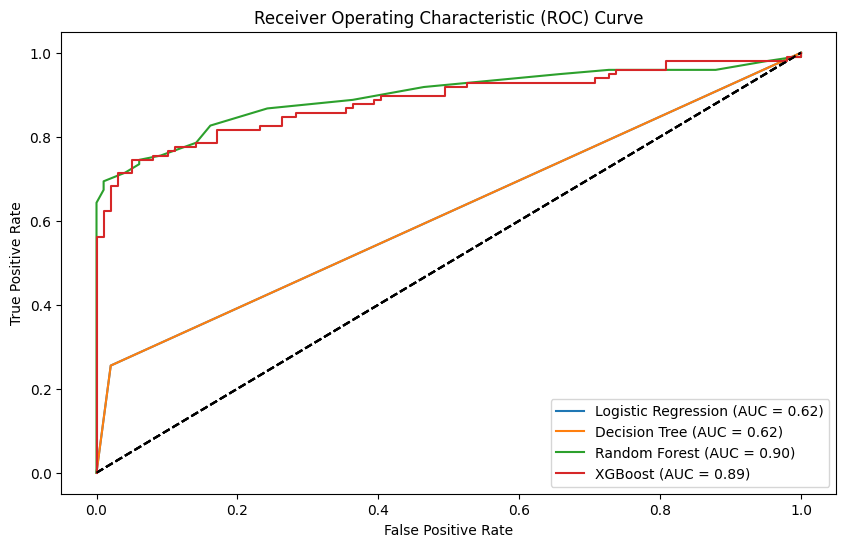

In [ ]:
#Plotting the Roc-auc curve for all the algorithms comparatively.

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve and print AUC score
def plot_roc_auc(y_true, y_prob, model_name):
  fpr, tpr, thresholds = roc_curve(y_true, y_prob)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')


# Get probability predictions for each model
y_prob_lr = model.predict_proba(X_test)[:, 1]
y_prob_dt = model.predict_proba(X_test)[:, 1]
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Plot ROC curves for each model
plt.figure(figsize=(10, 6))
plot_roc_auc(Y_test, y_prob_lr, 'Logistic Regression')
plot_roc_auc(Y_test, y_prob_dt, 'Decision Tree')
plot_roc_auc(Y_test, y_prob_rf, 'Random Forest')
plot_roc_auc(Y_test, y_prob_xgb, 'XGBoost')

plt.show()




 Inference:

The model with the highest AUC score is the best at distinguishing between the two classes (legit and fraud).

An AUC score of 1 represents a perfect classifier, while an AUC score of 0.5 represents a random classifier.

Higher AUC scores indicate better performance in terms of correctly identifying positive and negative cases.

Compare the AUC scores of the four models: Logistic Regression, Decision Tree, Random Forest, and XGBoost.

The model with the highest AUC score indicates better performance in distinguishin  g between legit and fraud transactions.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


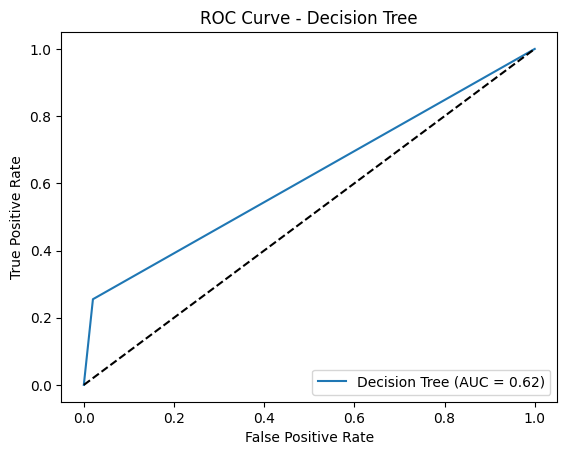

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


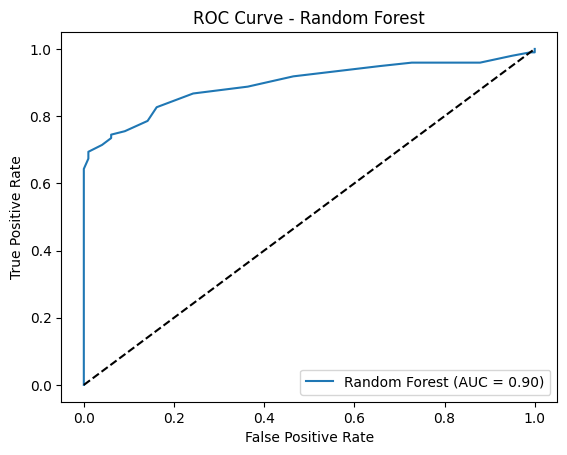

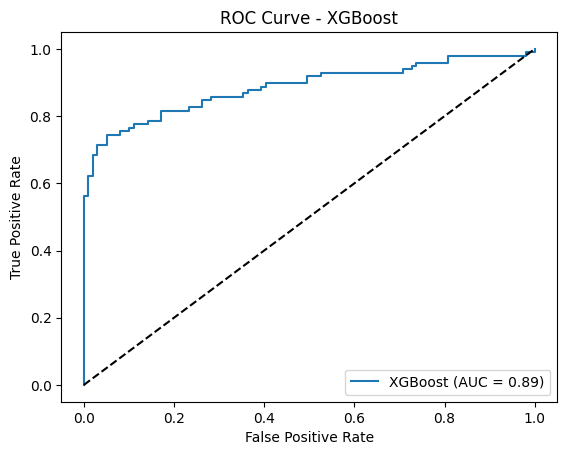

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


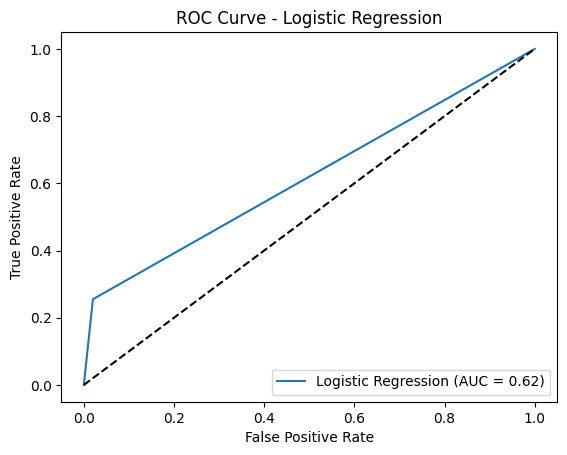

In [ ]:
# Function to plot ROC-AUC curve individually
def plot_roc_auc(model, X_test, Y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()


# Plot ROC-AUC for Decision Tree
plot_roc_auc(model, X_test, Y_test, 'Decision Tree')

# Plot ROC-AUC for Random Forest
plot_roc_auc(model_rf, X_test, Y_test, 'Random Forest')

# Plot ROC-AUC for XGBoost
plot_roc_auc(model_xgb, X_test, Y_test, 'XGBoost')

# Plot ROC-AUC for Logistic Regression
plot_roc_auc(model, X_test, Y_test, 'Logistic Regression')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



Logistic Regression Metrics:
-----------------------
Accuracy: 0.6193
Precision: 0.9259
Recall: 0.2551

Formulas:
-----------------------
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)


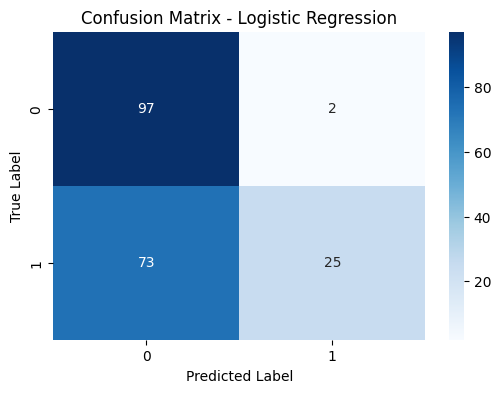

              precision    recall  f1-score   support

           0       0.57      0.98      0.72        99
           1       0.93      0.26      0.40        98

    accuracy                           0.62       197
   macro avg       0.75      0.62      0.56       197
weighted avg       0.75      0.62      0.56       197


Decision Tree Metrics:
-----------------------
Accuracy: 0.6193
Precision: 0.9259
Recall: 0.2551

Formulas:
-----------------------
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


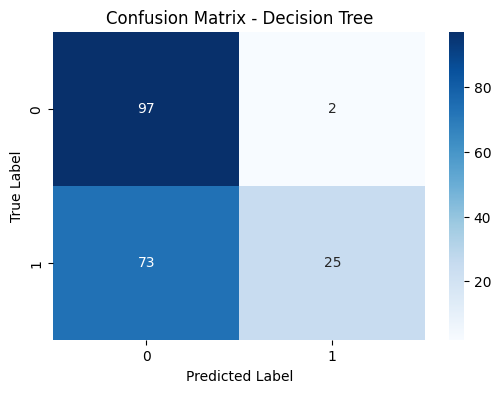

              precision    recall  f1-score   support

           0       0.57      0.98      0.72        99
           1       0.93      0.26      0.40        98

    accuracy                           0.62       197
   macro avg       0.75      0.62      0.56       197
weighted avg       0.75      0.62      0.56       197


Random Forest Metrics:
-----------------------
Accuracy: 0.6599
Precision: 1.0000
Recall: 0.3163

Formulas:
-----------------------
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


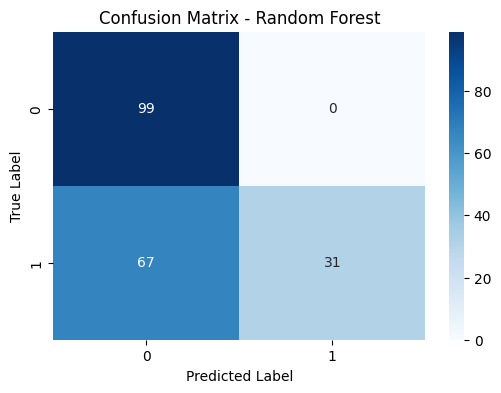

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        99
           1       1.00      0.32      0.48        98

    accuracy                           0.66       197
   macro avg       0.80      0.66      0.61       197
weighted avg       0.80      0.66      0.61       197


XGBoost Metrics:
-----------------------
Accuracy: 0.7107
Precision: 1.0000
Recall: 0.4184

Formulas:
-----------------------
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)


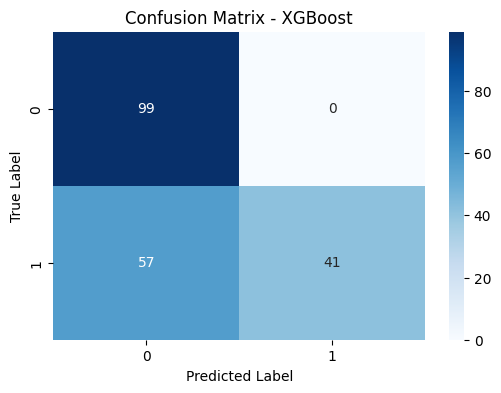

              precision    recall  f1-score   support

           0       0.63      1.00      0.78        99
           1       1.00      0.42      0.59        98

    accuracy                           0.71       197
   macro avg       0.82      0.71      0.68       197
weighted avg       0.82      0.71      0.68       197


Grid Search Cv Metrics:
-----------------------
Accuracy: 0.6599
Precision: 1.0000
Recall: 0.3163

Formulas:
-----------------------
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


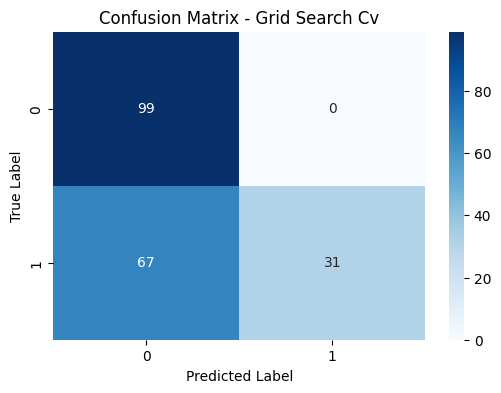

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        99
           1       1.00      0.32      0.48        98

    accuracy                           0.66       197
   macro avg       0.80      0.66      0.61       197
weighted avg       0.80      0.66      0.61       197



In [ ]:

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate and display precision, recall, and accuracy
def evaluate_model(model, X_test, Y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)

    print(f"\n{model_name} Metrics:")
    print("-----------------------")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    # Display formulas
    print("\nFormulas:")
    print("-----------------------")
    print("Accuracy = (TP + TN) / (TP + TN + FP + FN)")
    print("Precision = TP / (TP + FP)")
    print("Recall = TP / (TP + FN)")

    # Confusion Matrix
    cm = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Classification Report
    print(classification_report(Y_test, y_pred))


# Evaluate Logistic Regression
evaluate_model(model, X_test, Y_test, 'Logistic Regression')

# Evaluate Decision Tree
evaluate_model(model, X_test, Y_test, 'Decision Tree')

# Evaluate Random Forest
evaluate_model(model_rf, X_test, Y_test, 'Random Forest')

# Evaluate XGBoost
evaluate_model(model_xgb, X_test, Y_test, 'XGBoost')

# Evaluate Grid Search Cv
evaluate_model(best_model_rf, X_test, Y_test, 'Grid Search Cv')

# Accuracy: The overall correctness of the fraud detection system, considering both fraudulent and non-fraudulent transactions.
# Precision: Of the transactions that were flagged as fraudulent by the system, how many were actually fraudulent?
# Recall: Out of all the actual fraudulent transactions, how many did the system correctly identify?